# Trabalho de Analise Exploratória
Aluno: Luiz Felipe Antunes Oliveira

A Análise Exploratória é uma fase importante de uma tarefa de Ciência de Dados. É nesta fase que buscamos entender os dados com os seguintes objetivos:

- Identificar padrões iniciais
- Formular perguntas de pesquisa e hipóteses
- Identificar dados incompletos ou não confiáveis

Para atingir os objetivos, em geral usa-se uma combinação de análises estatísticas com uma grande ênfase em geração e interpretação de gráficos.

## Leitura e análise inicial dos dados


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()


In [100]:
%matplotlib inline

df = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_2016(LIMPO2).csv',
                      sep=',', encoding='utf-8')

In [101]:
df.drop(columns=['soma_total'], inplace=True)
df.head(50)

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,Misc,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,Platform,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,Shooter,26.93,0.63,0.28,0.47,28.31


Vamos começar com perguntas iniciais:

Qual a média das notas de redações das pessoas que estudam em escola pública e privada? Qual a idade máxima? Quantos valores únicos possuímos para a coluna NOTA_REDACAO?

In [102]:
# Media de vendas:
df["VENDAS(GLOBAL)"].mean()
#df["VENDAS(EU)"].mean()
#df["VENDAS(AN)"].mean()
#df["VENDAS(JP)"].mean()
#df["VENDAS(Outros)"].mean()



0.5334617455285808

In [104]:
# Maximo de vendas maxima
df["VENDAS(AN)"].max()

41.36

In [105]:
# Valores únicos para VENDAS GLOBAIS
len(df.groupby(["VENDAS(EU)"]).size())

307

In [106]:
# Valores únicos para SUBDIVISAO
len(df.groupby(["VENDAS(AN)"]).size())

402

#### Visualização da distribuição das variáveis

Existe alguma diferença na distribuição das vendas entre PLATAFORMA e jogos mais comprados?

<AxesSubplot:>

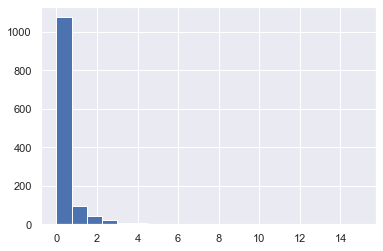

In [107]:
# Resposta para distribuição de plataforma X360
df_plat_x360 = df[df['PLATAFORMA'] == 'X360']
df_plat_x360["VENDAS(AN)"].hist(bins=20)

<AxesSubplot:ylabel='Density'>

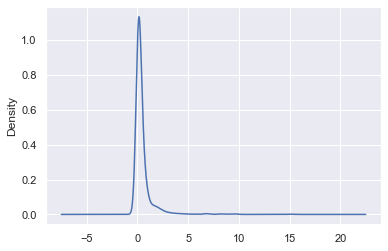

In [65]:
df_plat_x360["VENDAS(AN)"].plot.kde()

<AxesSubplot:>

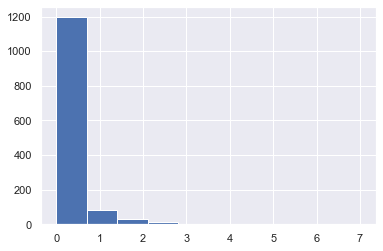

In [108]:
# Resposta para distribuição para PS3
df_plat_ps3 = df[df['PLATAFORMA'] == 'PS3']
df_plat_ps3["VENDAS(AN)"].hist(bins=10)

<AxesSubplot:ylabel='Density'>

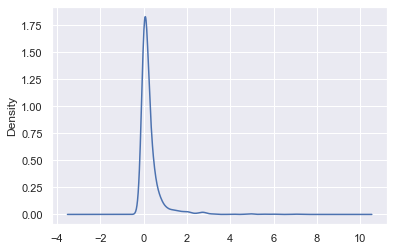

In [109]:
df_plat_ps3["VENDAS(AN)"].plot.kde()

Utilizando o seaborn para uma melhor visualização

In [110]:
sns.histplot(data=df, x="VENDAS(AN)", kde=True, hue="")

ValueError: Could not interpret value `` for parameter `hue`

<AxesSubplot:xlabel='NOTA_REDACAO', ylabel='Count'>

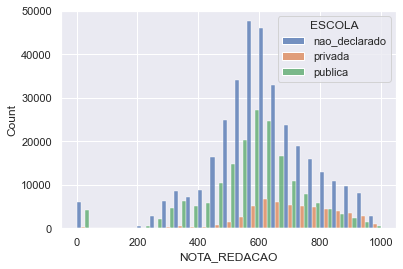

In [43]:
sns.histplot(data=df, x="NOTA_REDACAO", hue="ESCOLA", multiple="dodge", bins=25)

BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias.

In [146]:
sns.boxplot(data=df, x="PLATAFORMA", y="")

ValueError: Could not interpret input ''

### Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

Fazemos uma contagem dos assuntos mais comuns (usando groupby) e criamos uma lista contendo os assuntos com mais de 60 reclamações. Utilizaremos a lista para uso posterior.

In [79]:
df_grouped_top = df.groupby(['PLATAFORMA']).size().reset_index(name='COUNT')
df_grouped_top = df_grouped_top[df_grouped_top['COUNT'] > 60]
list_grouped = list(df_grouped_top['PLATAFORMA'])
list_grouped

['2600',
 '3DS',
 'DS',
 'GB',
 'GBA',
 'GC',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SNES',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Criando um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

In [135]:
df_plat = df[df['PLATAFORMA'].isin(list_grouped)]
df_plat

,NOME,PLATAFORMA,GENERO,VENDAS_AN,VENDAS_EU,VENDAS_JP,VENDAS_OUTROS,VENDAS_GLOBAL
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01
16713,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01
16714,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01
16715,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01


### Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Com o método crosstab() podemos gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas.

In [136]:
df_cross = pd.crosstab(df_plat.VENDAS_EU, df_plat.PLATAFORMA)
df_cross.head(20)

PLATAFORMA,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
VENDAS_EU,,,,,,,,,,,,,,,,,,,,,
0.00,2,271,1386,52,123,65,41,34,66,214,...,103,897,290,170,200,588,22,272,60,29
0.01,25,26,199,0,141,106,36,1,158,87,...,16,46,27,0,4,131,13,109,156,22
0.02,37,25,117,0,87,84,44,0,180,83,...,20,29,20,0,1,83,10,120,143,21
0.03,25,24,71,0,54,65,24,2,106,76,...,9,20,12,0,0,52,9,60,100,13
0.04,11,25,40,0,58,39,31,0,76,71,...,11,13,13,0,0,37,6,45,72,12
0.05,8,8,25,0,54,30,20,1,46,67,...,23,5,12,0,1,21,7,37,47,13
0.06,5,7,11,0,30,19,24,5,33,42,...,4,6,7,0,0,20,3,36,34,9
0.07,4,15,12,0,35,20,9,4,24,35,...,8,10,4,0,2,13,7,12,23,11
0.08,4,7,11,0,28,19,8,3,21,28,...,13,7,5,0,1,12,2,26,21,7


Usando o DataFrame obtido anteriormente vamos gerar a matriz de correlações entre escolas

In [144]:
df_corr = df_cross.corr()
df_corr

PLATAFORMA,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
PLATAFORMA,,,,,,,,,,,,,,,,,,,,,
2600,1.000000,0.205395,0.185186,0.023580,0.772870,0.899261,0.826619,0.100303,0.963111,0.599178,...,0.314876,0.091104,0.157389,0.029713,0.043845,0.282195,0.634866,0.566770,0.949334,0.729967
3DS,0.205395,1.000000,0.993622,0.969316,0.661666,0.530410,0.617356,0.947528,0.394388,0.849134,...,0.961123,0.989902,0.995628,0.979623,0.982068,0.989428,0.780173,0.898028,0.396270,0.692069
DS,0.185186,0.993622,1.000000,0.974578,0.649924,0.517506,0.588467,0.937243,0.376680,0.821323,...,0.950629,0.993807,0.997722,0.984478,0.987148,0.992713,0.754972,0.889029,0.380784,0.663700
GB,0.023580,0.969316,0.974578,1.000000,0.509019,0.359058,0.460071,0.936637,0.214889,0.732454,...,0.912054,0.988075,0.979574,0.989775,0.990074,0.949819,0.653307,0.803910,0.215241,0.545383
GBA,0.772870,0.661666,0.649924,0.509019,1.000000,0.964378,0.941673,0.589802,0.900052,0.918264,...,0.754815,0.572240,0.629261,0.516294,0.534054,0.728654,0.922835,0.889993,0.917290,0.951777
GC,0.899261,0.530410,0.517506,0.359058,0.964378,1.000000,0.939302,0.437830,0.970664,0.840006,...,0.624461,0.427703,0.490284,0.366242,0.383124,0.606662,0.860753,0.814782,0.980655,0.907788
N64,0.826619,0.617356,0.588467,0.460071,0.941673,0.939302,1.000000,0.533816,0.922393,0.897675,...,0.709514,0.517531,0.578346,0.464188,0.477440,0.668283,0.872643,0.860274,0.923077,0.937421
NES,0.100303,0.947528,0.937243,0.936637,0.589802,0.437830,0.533816,1.000000,0.294398,0.808235,...,0.923741,0.945284,0.944668,0.940017,0.943191,0.929988,0.742654,0.839714,0.296429,0.639648
PC,0.963111,0.394388,0.376680,0.214889,0.900052,0.970664,0.922393,0.294398,1.000000,0.752349,...,0.503282,0.283321,0.349962,0.220200,0.235889,0.473509,0.777770,0.728224,0.990418,0.857220


In [145]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

PLATAFORMA,2600,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
PLATAFORMA,,,,,,,,,,,,,,,,,,,,,,
2600,1.000000,0.205395,0.185186,0.023580,0.772870,0.899261,0.826619,0.100303,0.963111,0.599178,0.472424,0.334601,0.314876,0.091104,0.157389,0.029713,0.043845,0.282195,0.634866,0.566770,0.949334,0.729967
3DS,0.205395,1.000000,0.993622,0.969316,0.661666,0.530410,0.617356,0.947528,0.394388,0.849134,0.931632,0.977147,0.961123,0.989902,0.995628,0.979623,0.982068,0.989428,0.780173,0.898028,0.396270,0.692069
DS,0.185186,0.993622,1.000000,0.974578,0.649924,0.517506,0.588467,0.937243,0.376680,0.821323,0.907711,0.965607,0.950629,0.993807,0.997722,0.984478,0.987148,0.992713,0.754972,0.889029,0.380784,0.663700
GB,0.023580,0.969316,0.974578,1.000000,0.509019,0.359058,0.460071,0.936637,0.214889,0.732454,0.840882,0.923700,0.912054,0.988075,0.979574,0.989775,0.990074,0.949819,0.653307,0.803910,0.215241,0.545383
GBA,0.772870,0.661666,0.649924,0.509019,1.000000,0.964378,0.941673,0.589802,0.900052,0.918264,0.848632,0.756331,0.754815,0.572240,0.629261,0.516294,0.534054,0.728654,0.922835,0.889993,0.917290,0.951777
GC,0.899261,0.530410,0.517506,0.359058,0.964378,1.000000,0.939302,0.437830,0.970664,0.840006,0.749314,0.639795,0.624461,0.427703,0.490284,0.366242,0.383124,0.606662,0.860753,0.814782,0.980655,0.907788
N64,0.826619,0.617356,0.588467,0.460071,0.941673,0.939302,1.000000,0.533816,0.922393,0.897675,0.824234,0.718993,0.709514,0.517531,0.578346,0.464188,0.477440,0.668283,0.872643,0.860274,0.923077,0.937421
NES,0.100303,0.947528,0.937243,0.936637,0.589802,0.437830,0.533816,1.000000,0.294398,0.808235,0.893676,0.940033,0.923741,0.945284,0.944668,0.940017,0.943191,0.929988,0.742654,0.839714,0.296429,0.639648
PC,0.963111,0.394388,0.376680,0.214889,0.900052,0.970664,0.922393,0.294398,1.000000,0.752349,0.641240,0.517114,0.503282,0.283321,0.349962,0.220200,0.235889,0.473509,0.777770,0.728224,0.990418,0.857220


In [139]:
df_plat = pd.DataFrame(df_cross.sum(), columns=['COUNT'])
df_plat

,COUNT
PLATAFORMA,
2600,133
3DS,520
DS,2152
GB,98
GBA,822
GC,556
N64,319
NES,98
PC,974


<AxesSubplot:xlabel='COUNT', ylabel='PLATAFORMA'>

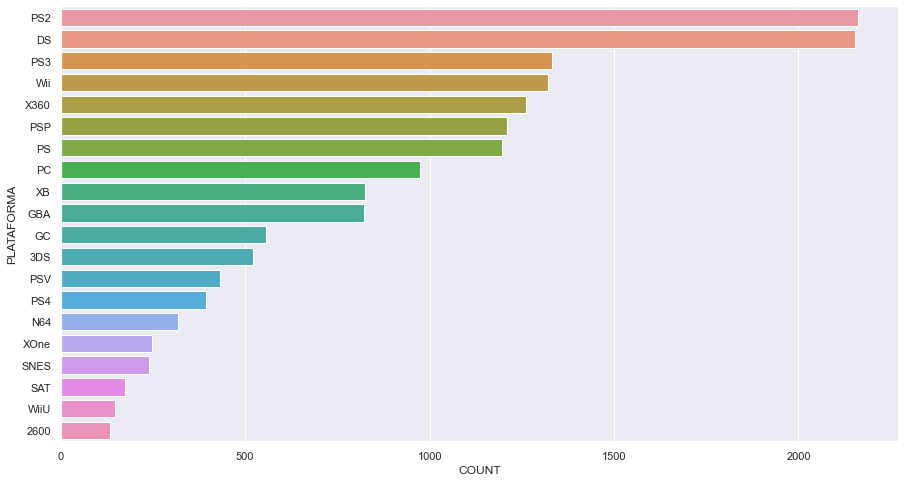

In [141]:
dfgraph = df.groupby(['PLATAFORMA']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="PLATAFORMA", orient="h")